In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
# pd.set_option('display.max_columns', None)  # Display all columns without truncation.

# Import processed data

In [9]:
folder_processed_data_path = './data/processed_data/'

movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_df.csv'))
movie_df.set_index(['wiki_ID'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in movie_df ? {movie_df.index.is_unique}")

character_df = pd.read_csv(os.path.join(folder_processed_data_path, 'character_df.csv'))
character_df.set_index(['wiki_ID', 'char_name'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in character_df ? {character_df.index.is_unique}")

name_by_movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'name_by_movie_df.csv'))
name_by_movie_df.set_index(['wiki_ID', 'char_words'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in name_by_movie_df ? {name_by_movie_df.index.is_unique}")

baby_name_df = pd.read_csv(os.path.join(folder_processed_data_path, 'baby_name_df.csv'))
baby_name_df.set_index(['name', 'year'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in baby_name_df ? {baby_name_df.index.is_unique}")

print("movie_df :")
display(movie_df.head())
print("character_df :")
display(character_df.head())
print("name_by_movie_df :")
display(name_by_movie_df.head())
print("baby_name_df :")
display(baby_name_df.head())

Is the indexing unique in movie_df ? True
Is the indexing unique in character_df ? True
Is the indexing unique in name_by_movie_df ? True
Is the indexing unique in baby_name_df ? True
movie_df :


,free_ID,mov_name,release,revenue,runtime,languages,countries,genres
wiki_ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


character_df :


free_ID     release         DOB gender  \
wiki_ID char_name                                                              
975900  Akooshay                    /m/03vyhn  2001-08-24  1958-08-26      F   
        Lieutenant Melanie Ballard  /m/03vyhn  2001-08-24  1974-08-15      F   
        Desolation Williams         /m/03vyhn  2001-08-24  1969-06-15      M   
        Sgt Jericho Butler          /m/03vyhn  2001-08-24  1967-09-12      M   
        Bashira Kincaid             /m/03vyhn  2001-08-24  1977-09-25      F   

                                    height   ethnicity            act_name  \
wiki_ID char_name                                                            
975900  Akooshay                     1.620         NaN      Wanda De Jesus   
        Lieutenant Melanie Ballard   1.780  /m/044038p  Natasha Henstridge   
        Desolation Williams          1.727     /m/0x67            Ice Cube   
        Sgt Jericho Butler           1.750         NaN       Jason Statham   
        Bashira Kincaid              1.650         NaN         Clea DuVall   

                                    age_at_release free_char_map1  \
wiki_ID char_name                                                   
975900  Akooshay                              42.0     /m/0bgchxw   
        Lieutenant Melanie Ballard            27.0      /m/0jys3m   
        Desolation Williams                   32.0      /m/0jys3g   
        Sgt Jericho Butler                    33.0     /m/02vchl6   
        Bashira Kincaid                       23.0     /m/02vbb3r   

                                   free_char_map2 free_char_map3  
wiki_ID char_name                                                 
975900  Akooshay                       /m/0bgcj3x     /m/03wcfv7  
        Lieutenant Melanie Ballard     /m/0bgchn4      /m/0346l4  
        Desolation Williams            /m/0bgchn_     /m/01vw26l  
        Sgt Jericho Butler             /m/0bgchnq      /m/034hyc  
        Bashira Kincaid                /m/0bgchp9      /m/01y9xg

name_by_movie_df :


,
wiki_ID,char_words
975900,Lieutenant
7668793,Lieutenant
24226493,Lieutenant
3388805,Lieutenant
8231713,Lieutenant


baby_name_df :


number
name  year        
Aaban 2007       5
      2009       6
      2010       9
      2011      11
      2012      11

### Lets check the data for a specific popular movie

chosen movie : The Shawshank Redemption

In [10]:
chosen_movie = 'The Shawshank Redemption'
chosen_movie_ID = movie_df.query('mov_name == @chosen_movie').index.values[0]
print(chosen_movie_ID)
chosen_movie_names = name_by_movie_df.loc[chosen_movie_ID].index.values
print(chosen_movie_names)

30625
['Captain' 'Andy' 'Brooks' 'Tommy' 'Boyd' 'Ellis' 'Warden' 'Norton'
 'Ernie' 'Diamond' 'Hadley' 'Floyd' 'Heywood' 'Redding' 'Skeet' 'Mert']


In [17]:
chosen_name_index = chosen_movie_names[1]
display(baby_name_df.loc[chosen_name_index])
print(f"type(baby_name_df.loc[chosen_name_index]) = {type(baby_name_df.loc[chosen_name_index])}")
print(baby_name_df.loc[chosen_name_index]['number'])

,number
year,
1880,58
1881,58
1882,51
1883,43
1884,55
...,...
2018,917
2019,879
2020,775


type(baby_name_df.loc[chosen_name_index]) = <class 'pandas.core.frame.DataFrame'>
year
1880     58
1881     58
1882     51
1883     43
1884     55
       ... 
2018    917
2019    879
2020    775
2021    663
2022    723
Name: number, Length: 143, dtype: int64


1994-09-10


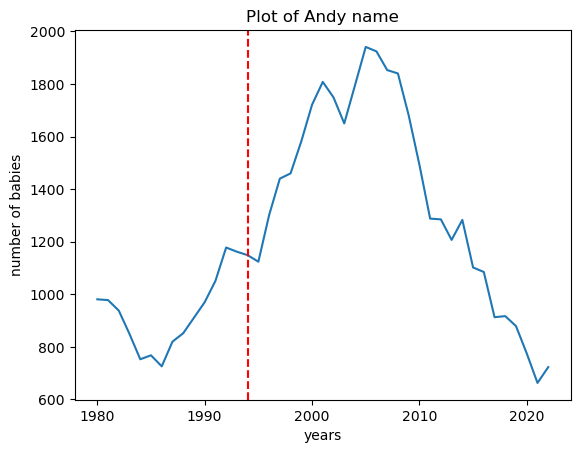

In [29]:
y_values = baby_name_df.loc[chosen_name_index]['number'].values
x_values = baby_name_df.loc[chosen_name_index].index.values

x_values = x_values[100:]
y_values = y_values[100:]

plt.plot(x_values, y_values)

# Plot the values in the specified column
# baby_name_df.loc[chosen_name_index]['number'].plot(kind='line')  # You can replace 'line' with other plot types like 'bar', 'hist', etc.

release_date = movie_df.loc[chosen_movie_ID]['release']
print(release_date)

# Display the plot
plt.title(f'Plot of Andy name')
plt.xlabel('years')  # Assuming the x-axis represents the index of the DataFrame
plt.ylabel('number of babies')
vertical_line_x = 1994  # Replace with your desired x-value
plt.axvline(x=vertical_line_x, color='red', linestyle='--', label='Vertical Line')
plt.show()

# Useless I think

### Plot Summaries Data :


In [ ]:
# import data
plot_summaries_path = 'MovieSummaries\\plot_summaries.txt'
plot_summaries_data = pd.read_csv(plot_summaries_path, sep='\t', header=None)

In [ ]:
# add column names deduced from README
plot_summaries_data.columns = ['wiki_ID', 'summary']

display(plot_summaries_data.head())

### Core NLP Summaries data

In [ ]:
import os
import gzip
import xml.etree.ElementTree as ET

# Specify the folder containing the compressed .gz files
folder_path = './MovieSummaries/corenlp_plot_summaries/'

# Create a list to store the parsed XML data
xml_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.gz'):
        gz_file_path = os.path.join(folder_path, file_name)
        with gzip.open(gz_file_path, 'rt') as xml_file:
            xml_content = xml_file.read()
            root = ET.fromstring(xml_content)
            xml_data.append(root)

# Now you should have the parsed XML data in the `xml_data` list


In [ ]:
import os
import gzip
import xml.etree.ElementTree as ET

# Specify the folder containing the compressed .gz files
folder_path = './MovieSummaries/corenlp_plot_summaries/'

# Create a list to store the parsed XML data
xml_data = []

for file_name in os.listdir(folder_path):
    print(f"file_name = {file_name}")
    if file_name.endswith('.gz'):
        gz_file_path = os.path.join(folder_path, file_name)
        with gzip.open(gz_file_path, 'rt') as xml_file:
            xml_content = xml_file.read()
            root = ET.fromstring(xml_content)
            xml_data.append(root)

# Combine all the parsed XML data into a single XML element
combined_root = ET.Element("root")  # Create a new root element

for xml_element in xml_data:
    combined_root.append(xml_element)

# Create an ElementTree from the combined XML data
combined_tree = ET.ElementTree(combined_root)

# Define the output file path for the combined XML
output_xml_file = 'combined_data.xml'

# Write the combined XML data to the output file
combined_tree.write(output_xml_file)

print(f"Combined XML data saved to {output_xml_file}")

### Character Metadata :


In [ ]:
# import data
character_metadata_path = 'MovieSummaries\\character.metadata.tsv'
character_metadata_data = pd.read_csv(character_metadata_path, sep='\t', header=None)

In [ ]:
# add column names deduced from README
character_metadata_data.columns = ['wiki_ID', 'free_ID', 'release', 'char_name', 'DOB', 'gender', 'height', 'ethnicity', 'act_name', 'age_at_release', 'free_char_map1', 'free_char_map2', 'free_char_map3']

display(character_metadata_data.head())

### Movie Metadata :


In [ ]:
# import data
movie_metadata_path = 'MovieSummaries\\movie.metadata.tsv'
movie_metadata_data = pd.read_csv(movie_metadata_path, sep='\t', header=None)

In [ ]:
# add column names deduced from README
movie_metadata_data.columns = ['wiki_ID', 'free_ID', 'mov_name', 'release', 'revenue', 'runtime', 'languages', 'countries', 'genres']

display(movie_metadata_data.head())

### Name Clusters Test Data:


In [ ]:
# import data
name_clusters_path = 'MovieSummaries\\name.clusters.txt'
name_clusters_data = pd.read_csv(name_clusters_path, sep='\t', header=None)

In [ ]:
display(name_clusters_data.head())

### TVTropes Clusters Test Data:


In [ ]:
# import data
tvtropes_clusters_path = 'MovieSummaries\\tvtropes.clusters.txt'
tvtropes_clusters_data = pd.read_csv(tvtropes_clusters_path, sep='\t', header=None)

In [ ]:
display(tvtropes_clusters_data.head())